In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
raw_df = pd.read_csv('data/AmesHousing.csv', index_col=0)

In [25]:
raw_df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000


<AxesSubplot:ylabel='Order'>

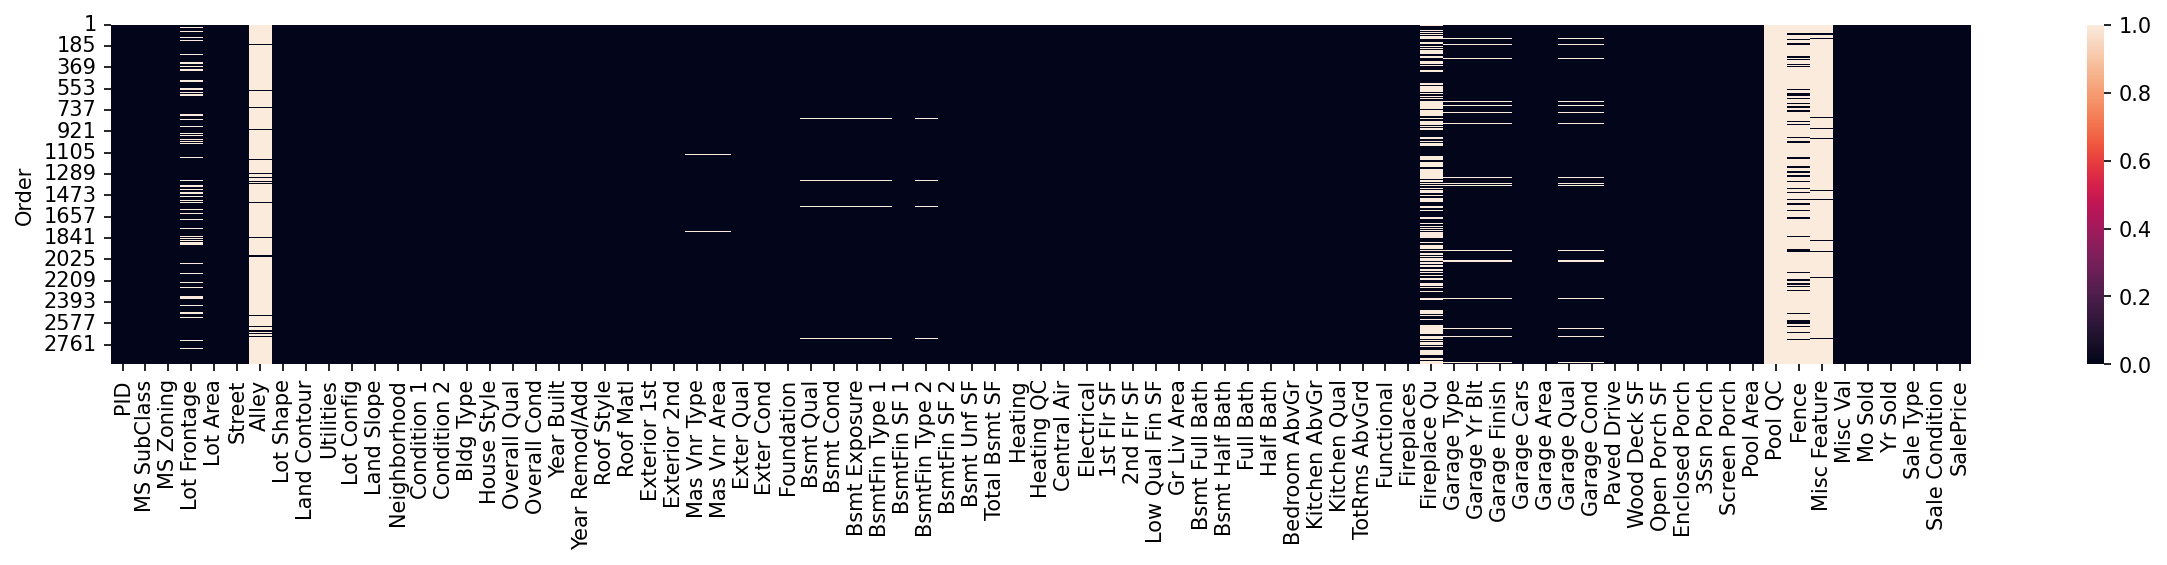

In [26]:
plt.figure(figsize=(20, 3), dpi=150)
sns.heatmap(raw_df.isnull())

Columns such as:
"Pool QC",
"Alley",
"Fireplace Qu",
"Fence",
"Misc Feature",
"Lot Frontage"


were in the vast majority defective, which meant that they did not present much value, so we decided to remove them.

In [27]:
no_na_df = raw_df.drop(["Pool QC", "Alley","Fireplace Qu","Fence","Misc Feature","Lot Frontage"], axis = 1)

<AxesSubplot:ylabel='Order'>

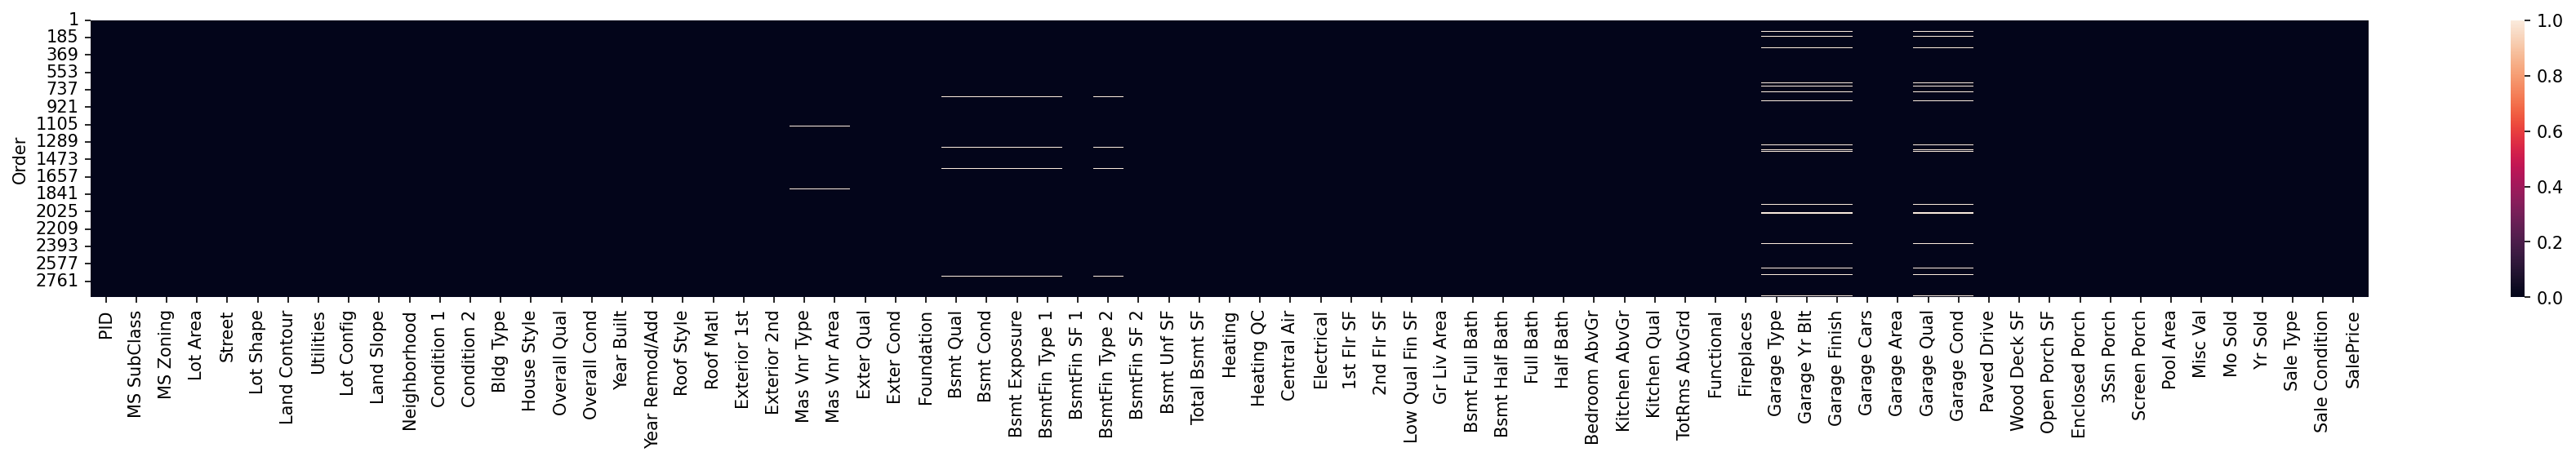

In [28]:
plt.figure(figsize=(30, 3), dpi=150)
sns.heatmap(no_na_df.isnull())

W przypadku Mas Vnr Type oraz Mas Vnr Area zdecydowaliśmy się wypełnić brakujące wartości za pomocą odpowiednio "none" oraz 0.

In [29]:
no_na_df["Mas Vnr Type"].fillna('None', inplace = True)

In [30]:
no_na_df["Mas Vnr Area"].fillna(0, inplace = True)

In [31]:
no_na_df["Mas Vnr Type"].value_counts()

None       1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: Mas Vnr Type, dtype: int64

In [32]:
no_na_df["Mas Vnr Area"].value_counts()

0.0       1771
120.0       15
176.0       13
200.0       13
216.0       12
          ... 
714.0        1
647.0        1
1290.0       1
495.0        1
443.0        1
Name: Mas Vnr Area, Length: 445, dtype: int64

<AxesSubplot:ylabel='Order'>

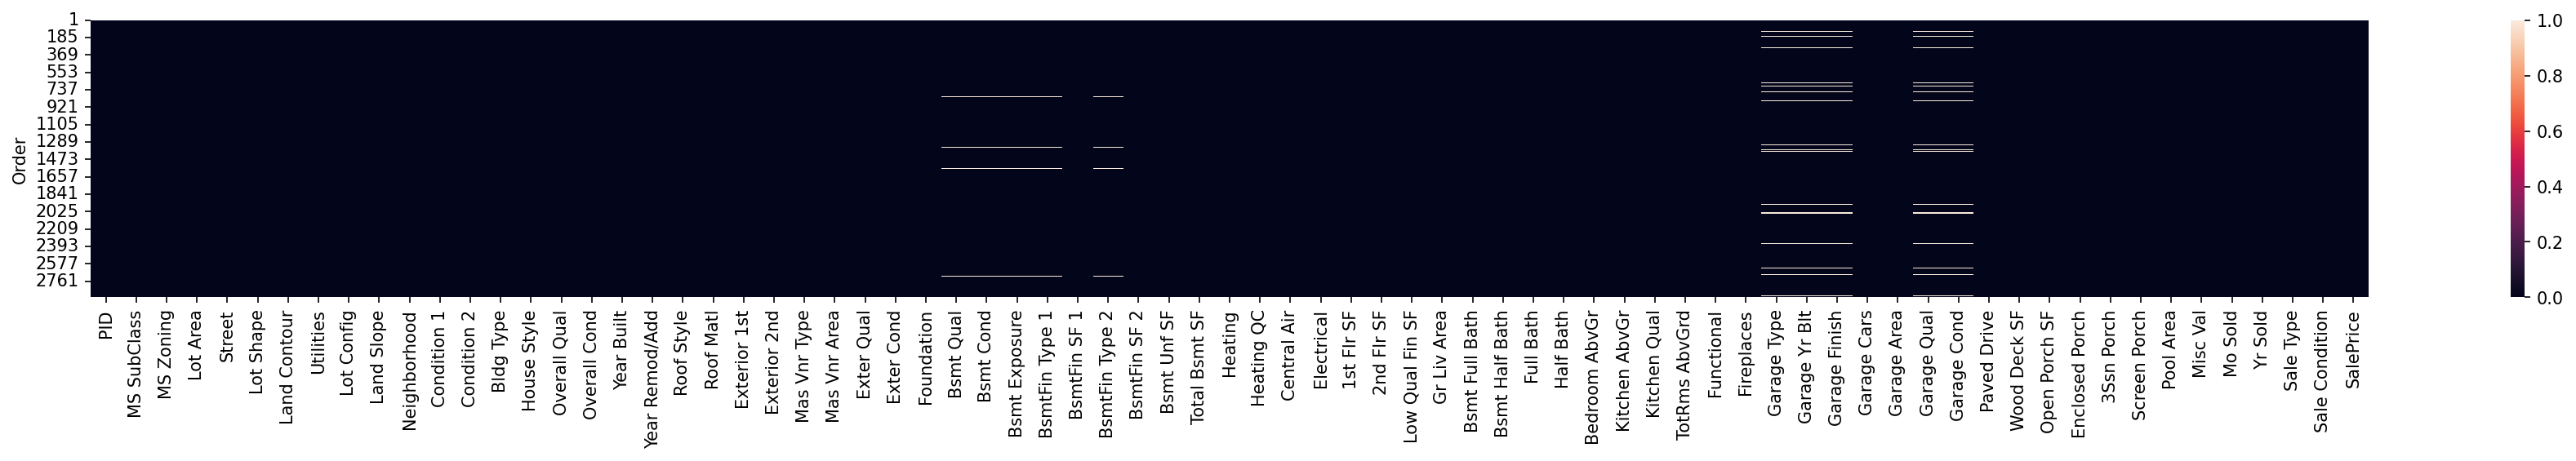

In [33]:
plt.figure(figsize=(30, 3), dpi=150)
sns.heatmap(no_na_df.isnull())

In [34]:
no_na_df[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF']].fillna("Na", inplace = True)

C:\Users\kacpe\AppData\Local\Temp/ipykernel_15172/3760124395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_na_df[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',


<AxesSubplot:ylabel='Order'>

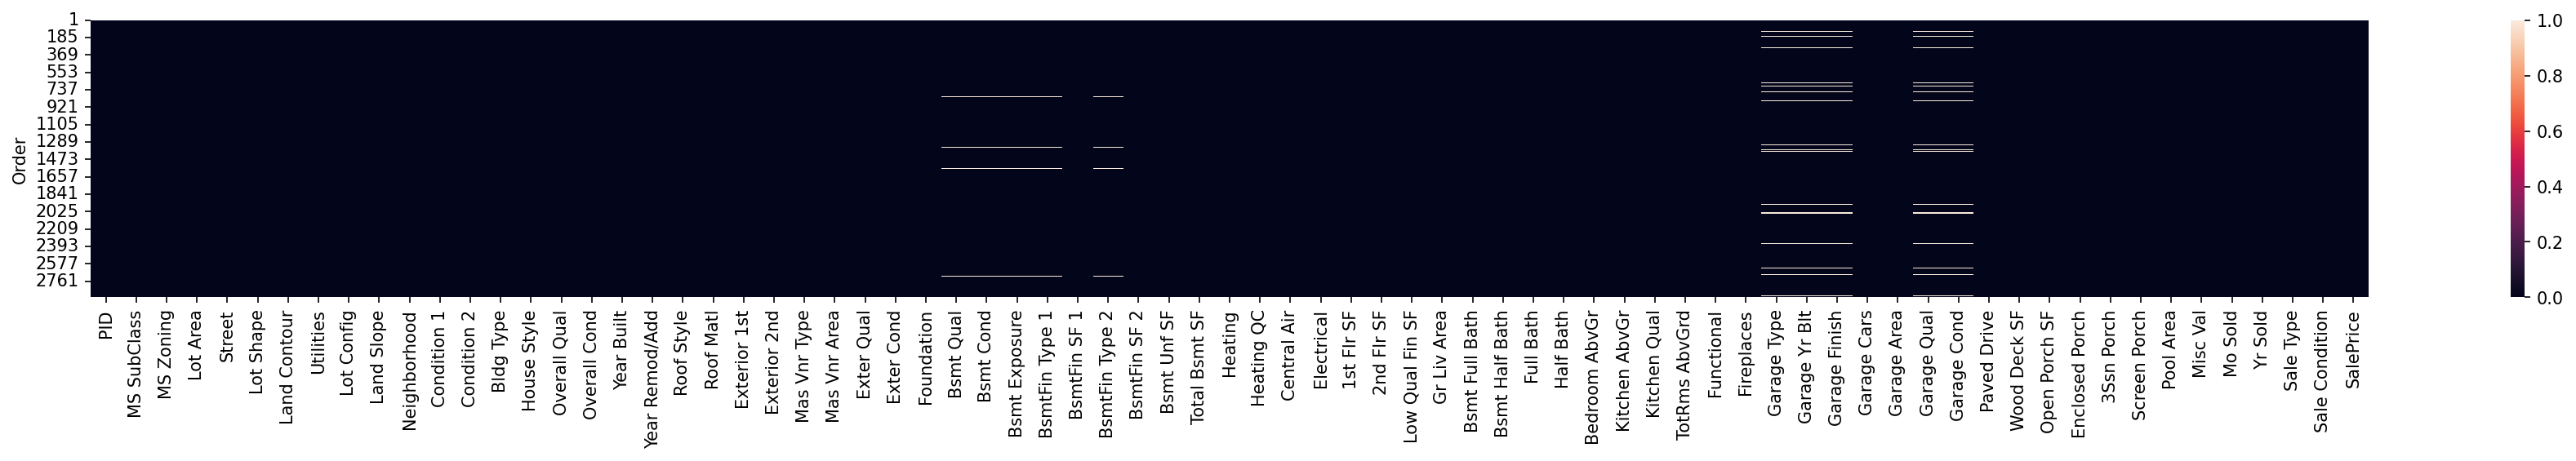

In [35]:
plt.figure(figsize=(30, 3), dpi=150)
sns.heatmap(no_na_df.isnull())

In [36]:
no_na_df["Neighborhood"].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [42]:
no_na_df.fillna('None', inplace = True)

<AxesSubplot:ylabel='Order'>

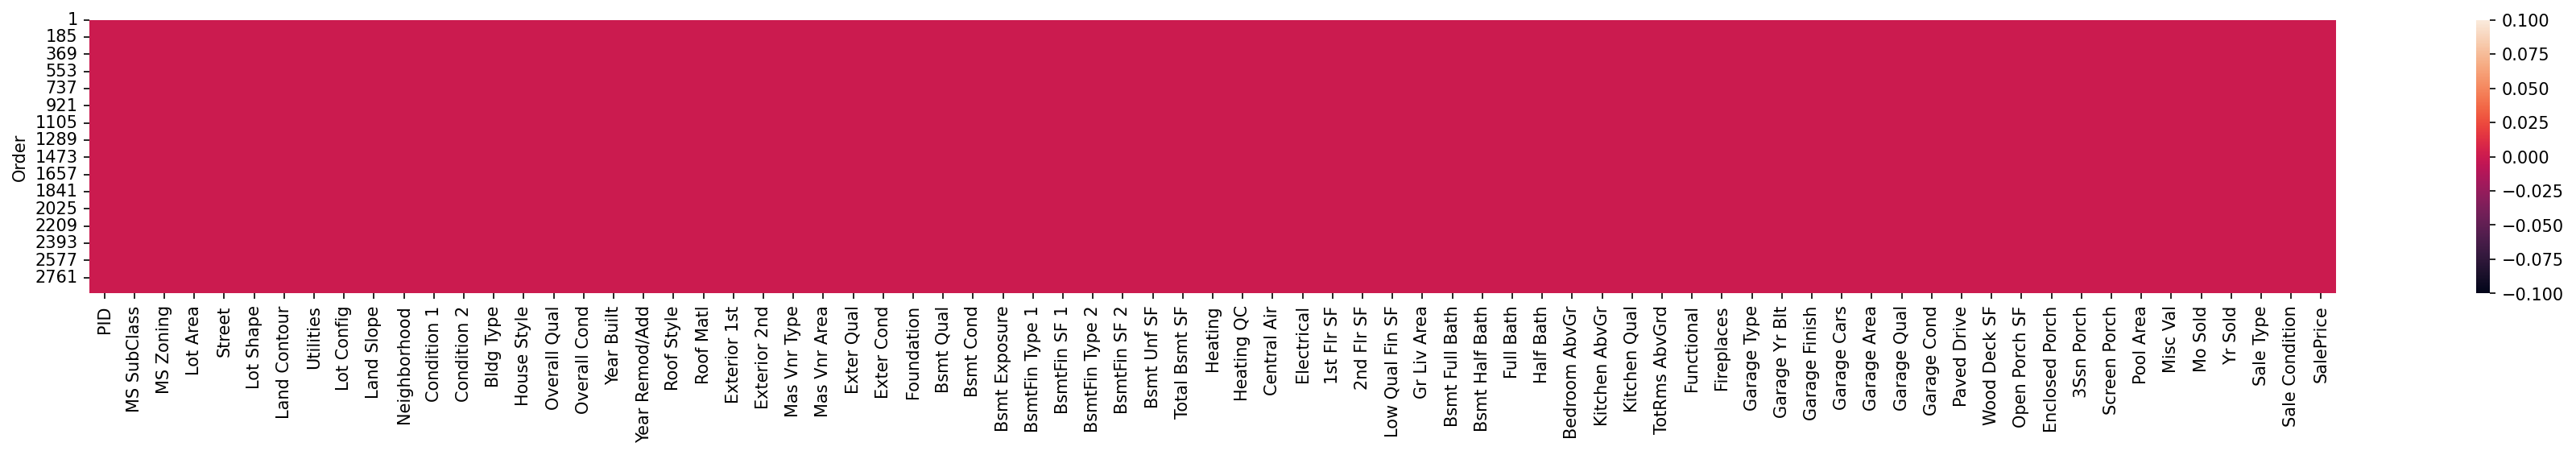

In [43]:
plt.figure(figsize=(30, 3), dpi=150)
sns.heatmap(no_na_df.isnull())

In [44]:
no_na_df["PID"]

Order
1       526301100
2       526350040
3       526351010
4       526353030
5       527105010
          ...    
2926    923275080
2927    923276100
2928    923400125
2929    924100070
2930    924151050
Name: PID, Length: 2930, dtype: int64

In [48]:
no_na_df.drop(axis = 1 ,columns = "PID", inplace = True)

In [68]:
no_na_df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Q

# Development of Shortcuts

In [72]:
neig = {
        "Blmngtn":"Bloomington Heights",
       "Blueste":"Bluestem",
       "BrDale":"Briardale",
       "BrkSide":"Brookside",
       "ClearCr":"Clear Creek",
       "CollgCr":"College Creek",
       "Crawfor":"Crawford",
       "Edwards":"Edwards",
       "Gilbert":"Gilbert",
       "IDOTRR":"Iowa DOT and Rail Road",
       "MeadowV":"Meadow Village",
       "Mitchel":"Mitchell",
       "NAmes":"North Ames",
       "NoRidge":"Northridge",
       "NPkVill":"Northpark Villa",
       "NridgHt":"Northridge Heights",
       "NWAmes":"Northwest Ames",
       "OldTown":"Old Town",
       "SWISU":"South & West of Iowa State University",
       "Sawyer":"Sawyer",
       "SawyerW":"Sawyer West",
       "Somerst":"Somerset",
       "StoneBr":"Stone Brook",
       "Timber":"Timberland",
       "Veenker":"Veenker"
}

In [74]:
no_na_df['Neighborhood full name'] = no_na_df['Neighborhood'].map(neig)

In [76]:
no_na_df[['Neighborhood full name','Neighborhood' ]]

,Neighborhood full name,Neighborhood
Order,,
1,North Ames,NAmes
2,North Ames,NAmes
3,North Ames,NAmes
4,North Ames,NAmes
5,Gilbert,Gilbert
...,...,...
2926,Mitchell,Mitchel
2927,Mitchell,Mitchel
2928,Mitchell,Mitchel


In [81]:
no_na_df["Yr Sold"].value_counts()

2007    694
2009    648
2006    625
2008    622
2010    341
Name: Yr Sold, dtype: int64

# Clean DATA

In [79]:
pwd

'C:\\Users\\kacpe\\Desktop\\uczelnia\\sem4\\Projekt Systemy'

In [80]:
no_na_df.to_csv("data\CleanData.csv")